<a href="https://colab.research.google.com/github/rohandawar/TimeSeries/blob/main/Time_Series_Analysis_On_Air_traffic_Passengers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inital Setup

## Import Standard Packages

In [47]:
# Importing the Libs

# General
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Pylab
from pylab import rcParams

# Statsmodel
import statsmodels.api as sm

# warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.metrics import mean_squared_error

## Import Time series Data: Airline Passange Traffic

In [48]:
# read the data

data = pd.read_csv('https://raw.githubusercontent.com/rohandawar/TimeSeries/main/airline-passenger-traffic.csv')
data.columns = ['Month', 'Passangers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head()

,Passangers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


## Time Series Analysis

### Plotting the time series data

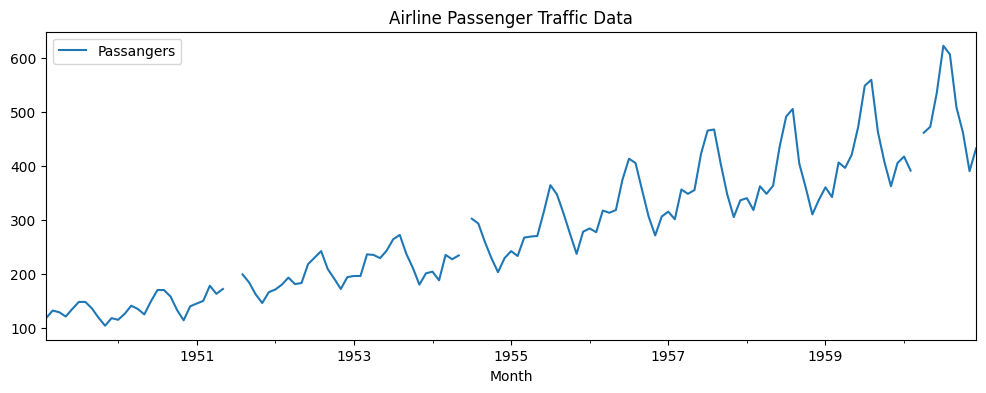

In [49]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show(block=False)

### Missing Value Imputations


#### Mean Imputation

In [50]:
data = data.assign(Passangers_Mean_Imputation = data.Passangers.fillna(data.Passangers.mean()))
data.head()

,Passangers,Passangers_Mean_Imputation
Month,,
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0
1949-06-01,135.0,135.0


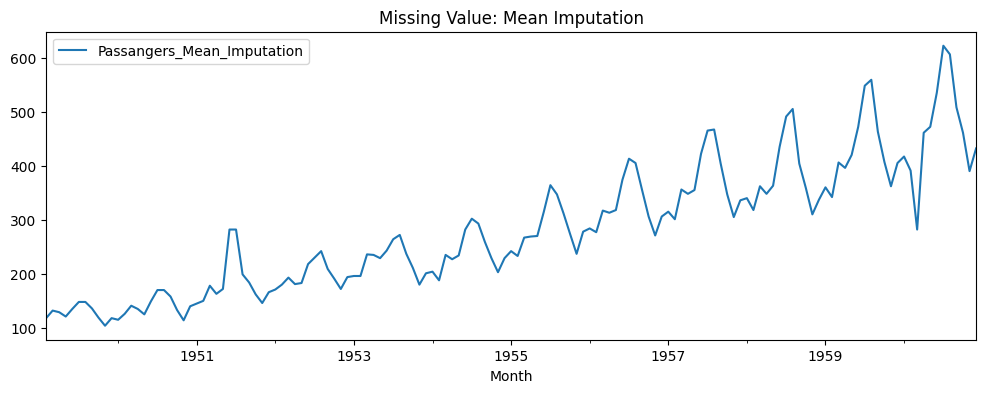

In [51]:
# Plotting post imputation
data[['Passangers_Mean_Imputation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Mean Imputation')
plt.show(block=False)

#### Linear Interpolation

In [52]:
data = data.assign(Passangers_Linear_Interpolation=data.Passangers.interpolate(method='linear'))
data.head()

,Passangers,Passangers_Mean_Imputation,Passangers_Linear_Interpolation
Month,,,
1949-02-01,118.0,118.0,118.0
1949-03-01,132.0,132.0,132.0
1949-04-01,129.0,129.0,129.0
1949-05-01,121.0,121.0,121.0
1949-06-01,135.0,135.0,135.0


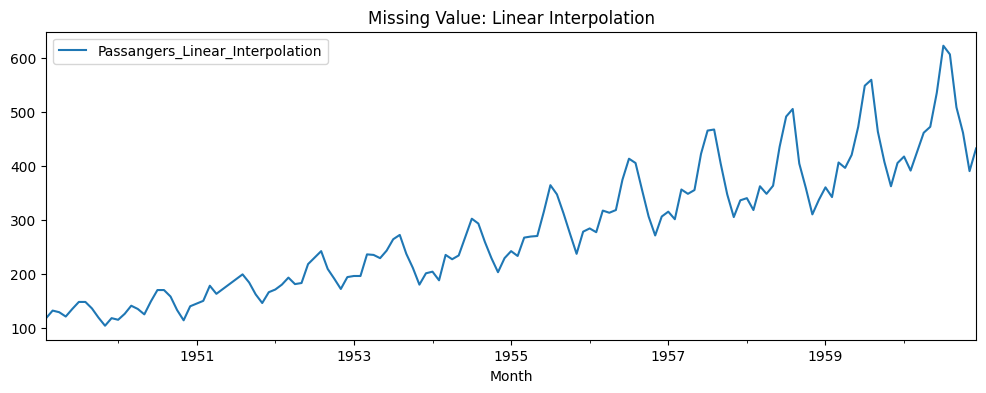

In [53]:
data[['Passangers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing Value: Linear Interpolation')
plt.show(block=False)

_Using **Liner Interpolation** for imputing the missing Values_

In [54]:
data['Passangers'] = data['Passangers_Linear_Interpolation']
data.drop(['Passangers_Mean_Imputation', 'Passangers_Linear_Interpolation'], axis=1,inplace=True)
data.head()

,Passangers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


## Outlier Detection

### Box plot & Interquartile range

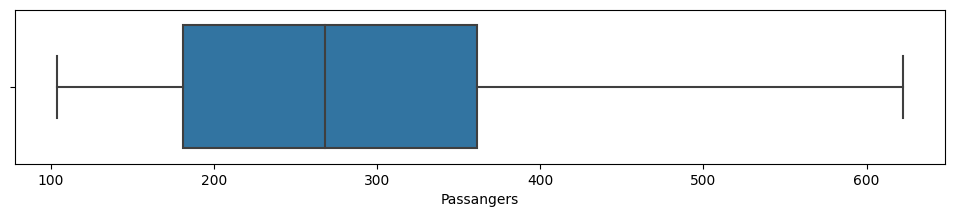

In [55]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passangers'], whis=1.5)

### Plotting the Histgram


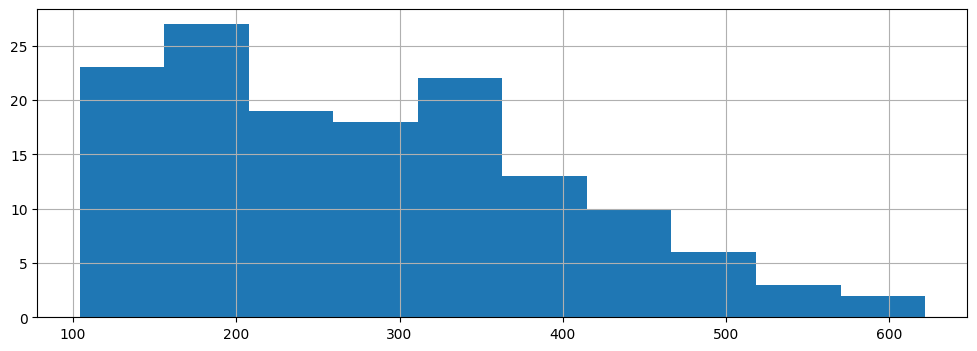

In [56]:
fig = data.Passangers.hist(figsize=(12,4))

_No Outliers in the data_

## Time Series Decomposition

### Additive Seasonal Decomposition

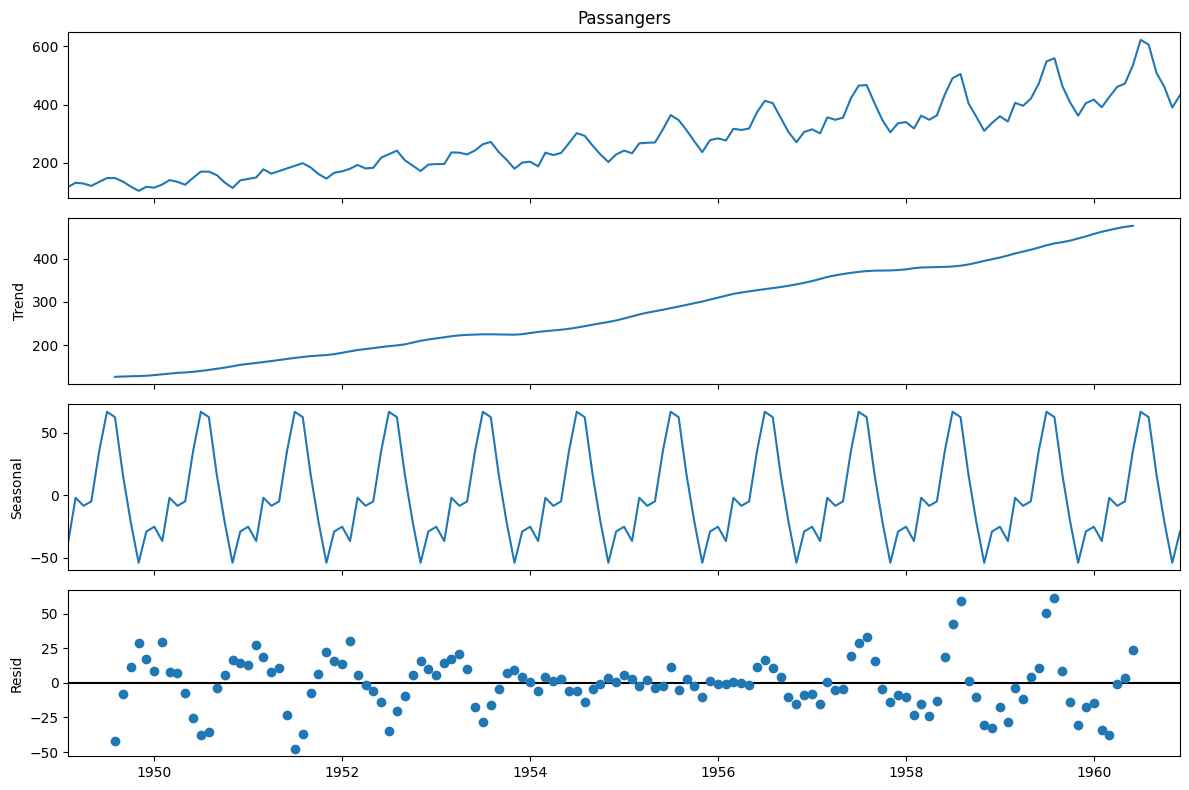

In [57]:
rcParams['figure.figsize']=12,8
decompose_additive = sm.tsa.seasonal_decompose(data.Passangers, model='additive')
fig = decompose_additive.plot()
plt.show()

# Multiplicative Seasonal Decomposition

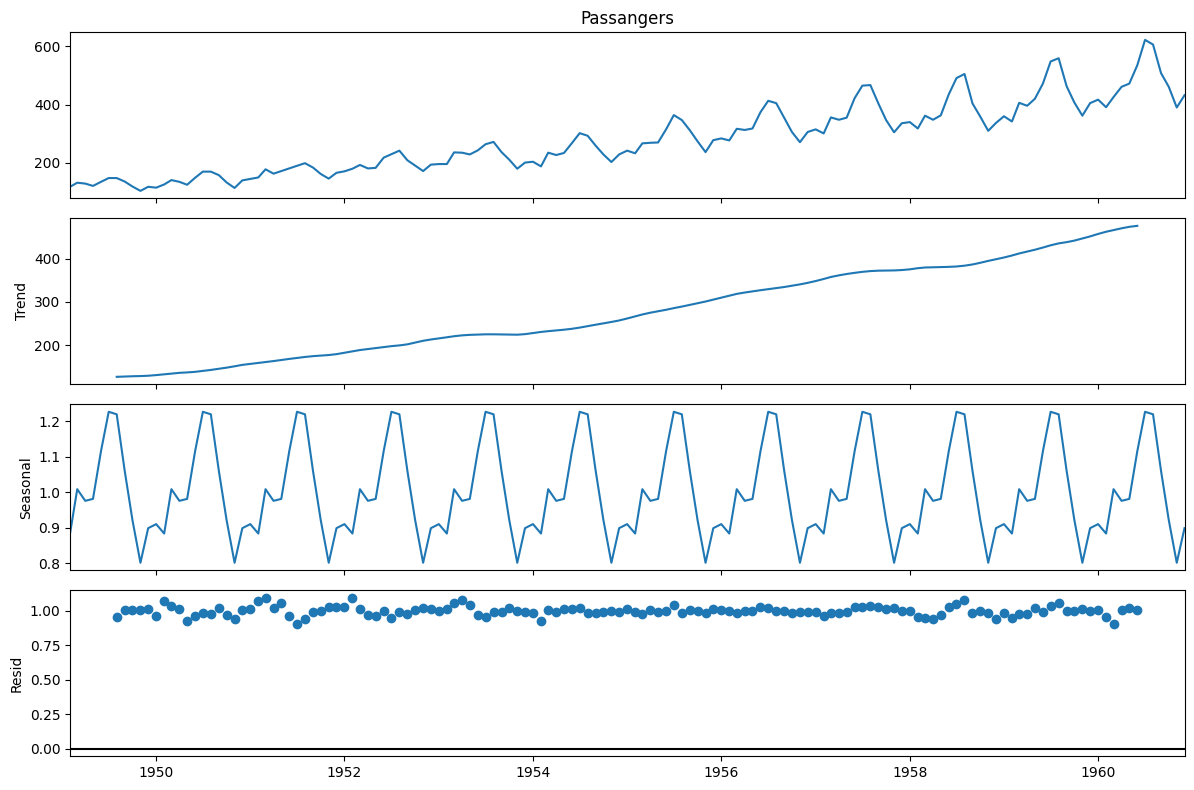

In [58]:
decompose_Multiplicative = sm.tsa.seasonal_decompose(data.Passangers, model='multiplicative')
fig = decompose_Multiplicative.plot()

## Build & evalute a Time Series Forecasting Method

### Split the historical data into training & test set

In [59]:
train_len = 120 # first 120 would be training set
train = data[0:train_len]
test = data[train_len:]
train.shape, test.shape

((120, 1), (23, 1))

## Naive Method

In [60]:
y_hat_naive =test.copy()
y_hat_naive['naive_forecast'] = train['Passangers'][train_len-1]

### Plot Train & test forecasts

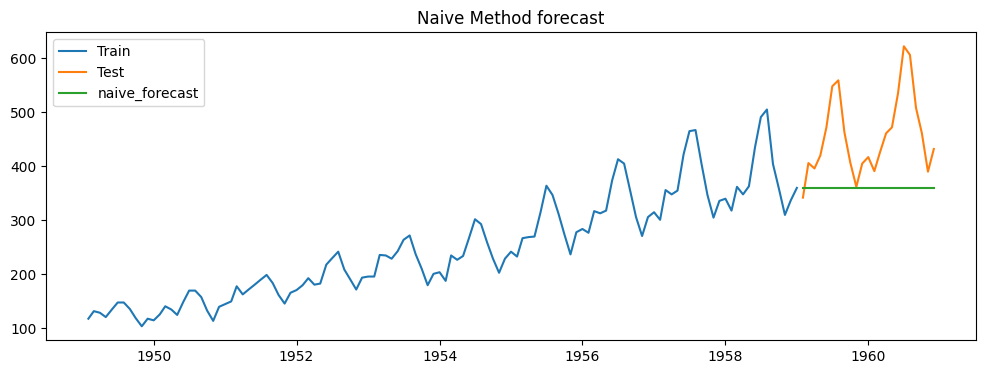

In [61]:
plt.figure(figsize=(12,4))
plt.plot(train['Passangers'], label='Train')
plt.plot(test['Passangers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='naive_forecast')
plt.legend(loc='best')
plt.title('Naive Method forecast')
plt.show()

### Simple Average Method

In [62]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passangers'].mean()

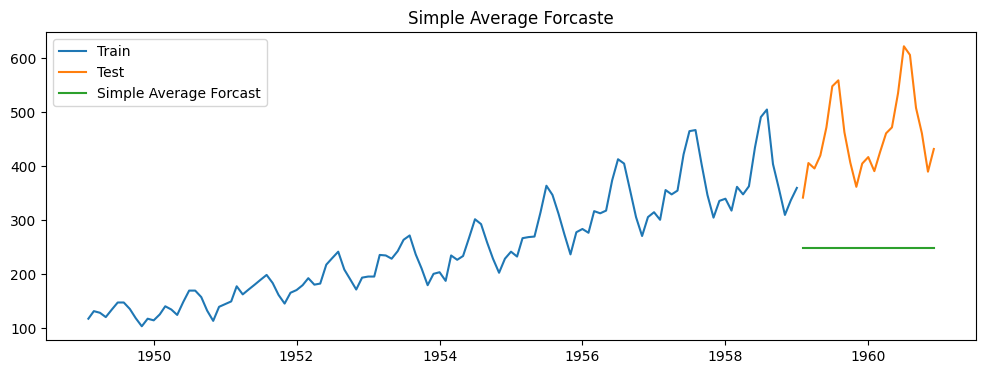

In [63]:
# plot the train, test & forcaste tables
plt.figure(figsize=(12,4))
plt.plot(train['Passangers'], label='Train')
plt.plot(test['Passangers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple Average Forcast')
plt.legend(loc='best')
plt.title('Simple Average Forcaste')
plt.show()

### RMSE & MAPE for Naive forecast


In [64]:
rmse = np.sqrt(mean_squared_error(test['Passangers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passangers']-y_hat_naive['naive_forecast'])/test['Passangers'])*100,2)

results = pd.DataFrame({'Method':['Naive Method'],
                        'MAPE':[mape],
                        'RMSE':[rmse]})
results

,Method,MAPE,RMSE
0,Naive Method,19.68,121.4


### RMSE & MAPE for Simple Average


In [65]:
rmse = np.sqrt(mean_squared_error(test['Passangers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passangers']-y_hat_avg['avg_forecast'])/test['Passangers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average'],
                        'MAPE':[mape],
                        'RMSE':[rmse]})

results = pd.concat([results, tempResults]).reset_index(drop=True)
results

,Method,MAPE,RMSE
0,Naive Method,19.68,121.4
1,Simple Average,44.36,221.2


## Simple moving average method

In [66]:
y_hat_sma = data.copy()

ma_window = 12
y_hat_sma['sma_forecast'] = data['Passangers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

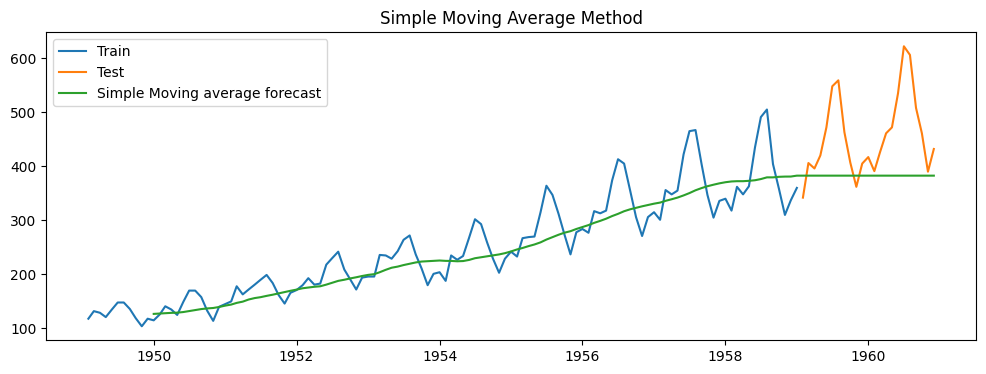

In [67]:
# plot train, test & forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passangers'], label='Train')
plt.plot(test['Passangers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show(block=False)


### Calculating the RMSE & MAPE for the Simple Moving Average Approach

In [68]:
rmse = np.sqrt(mean_squared_error(test['Passangers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passangers']-y_hat_sma['sma_forecast'][train_len:])/test['Passangers'])*100,2)


tempResults = pd.DataFrame({'Method':['Simple Moving Average'],
                        'MAPE':[mape],
                        'RMSE':[rmse]})
results = pd.concat([tempResults, results]).reset_index(drop=True)
results

,Method,MAPE,RMSE
0,Simple Moving Average,15.67,104.28
1,Naive Method,19.68,121.40
2,Simple Average,44.36,221.20
